<a href="https://colab.research.google.com/github/muhsufyan/iseng/blob/main/penjualan_mingguan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv")
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,...,Normalized 12,Normalized 13,Normalized 14,Normalized 15,Normalized 16,Normalized 17,Normalized 18,Normalized 19,Normalized 20,Normalized 21,Normalized 22,Normalized 23,Normalized 24,Normalized 25,Normalized 26,Normalized 27,Normalized 28,Normalized 29,Normalized 30,Normalized 31,Normalized 32,Normalized 33,Normalized 34,Normalized 35,Normalized 36,Normalized 37,Normalized 38,Normalized 39,Normalized 40,Normalized 41,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,...,0.72,0.33,0.33,0.33,0.61,0.33,0.00,0.50,0.11,0.44,0.22,0.50,0.11,0.33,0.22,0.39,0.11,0.44,0.22,0.39,0.50,0.17,0.11,0.61,0.39,0.33,0.50,0.78,0.22,0.44,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,...,0.60,0.20,0.00,0.60,0.20,0.70,0.70,0.90,0.40,0.70,0.20,0.40,0.50,0.30,0.50,0.80,0.50,0.50,0.30,0.10,0.30,0.20,0.30,1.00,0.50,0.20,0.70,0.30,0.20,0.50,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,...,0.09,0.36,0.82,0.45,0.36,0.73,0.64,0.36,0.36,0.91,0.73,0.45,0.64,0.45,1.00,0.18,0.00,0.91,0.73,0.55,0.36,0.45,0.36,0.55,0.27,0.82,0.82,0.55,0.00,0.18,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,...,0.18,0.12,0.76,0.29,0.53,0.41,0.76,0.12,0.24,0.29,0.53,0.29,0.41,0.24,0.47,0.47,0.00,0.24,0.29,0.00,0.18,0.59,0.18,1.00,0.35,0.24,0.35,0.35,0.59,0.24,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,...,0.33,0.07,0.67,0.33,0.47,0.80,0.20,0.67,0.53,0.20,0.47,0.40,0.33,0.60,0.33,0.40,0.67,0.00,0.13,0.00,0.13,0.13,0.40,0.27,0.07,0.33,0.33,0.13,0.13,0.33,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,1,0,0,1,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,...,0.33,0.00,0.33,0.33,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.00,0.00,0.00,0.00,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.33,0.67,0.33,0.00,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,1,0,2,2,0,5,1,1,1,2,3,1,0,2,1,7,3,3,3,2,2,3,1,1,4,5,4,3,2,4,...,0.29,0.00,0.71,0.14,0.14,0.14,0.29,0.43,0.14,0.00,0.29,0.14,1.00,0.43,0.43,0.43,0.29,0.29,0.43,0.14,0.14,0.57,0.71,0.57,0.43,0.29,0.57,0.86,0.86,1.00,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.25,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.25,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1,1,0,1,1,0,1,1,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.50,0.00,1.00,0.50,0.50,0.00,0.50,0.50,0.00,0.50,0.50,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [ ]:
df.columns

Index(['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8',
       ...
       'Normalized 42', 'Normalized 43', 'Normalized 44', 'Normalized 45',
       'Normalized 46', 'Normalized 47', 'Normalized 48', 'Normalized 49',
       'Normalized 50', 'Normalized 51'],
      dtype='object', length=107)

In [ ]:
df.shape

(811, 107)

* terdpt 107 kolom dimana 52 untuk week ke 1-52, normalisasi week 1-52
* product_code untuk kode product dan setiap minggu isinya adlh jumlah transaksi product yg terjual
* data berjenis time series



In [ ]:
df.columns.get_loc("Normalized 0")

55

In [ ]:
df.iloc[:, df.shape[1]-1]

0      0.39
1      0.00
2      0.36
3      0.35
4      0.40
       ... 
806    0.00
807    0.71
808    0.75
809    0.00
810    0.33
Name: Normalized 51, Length: 811, dtype: float64

In [ ]:
# hapus normalisasi
df = df.drop(df.iloc[:, 55:df.shape[1]], axis=1)

In [ ]:
# hapus MIN MAX
df = df.drop(["MIN","MAX"], axis=1)

In [ ]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,1,0,0,1,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,1,0,2,2,0,5,1,1,1,2,3,1,0,2,1,7,3,3,3,2,2,3,1,1,4,5,4,3,2,4,6,6,7,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0


karena penjualan produk setiap minggunya ada yg bernilai 0 maka tdk perlu lagi mencari nilai yg NaN/missing value

### bagaimana gambaran penjualan produk setiap minggunya ?
total transaksi penjualan setiap minggu

In [ ]:
sum_col = df.sum(axis=0) 

In [ ]:
sum_col = sum_col.drop(["Product_Code"], axis=0)

In [ ]:
sum_col

W0     7220
W1     7404
W2     7615
W3     7881
W4     7765
W5     7677
W6     7883
W7     7774
W8     7935
W9     7852
W10    7940
W11    7849
W12    7970
W13    7856
W14    8035
W15    8147
W16    8137
W17    8033
W18    8116
W19    7822
W20    7988
W21    7875
W22    8031
W23    7998
W24    8245
W25    7212
W26    5637
W27    5834
W28    5988
W29    5952
W30    6170
W31    6172
W32    6293
W33    6412
W34    6482
W35    6486
W36    6500
W37    6548
W38    6692
W39    6460
W40    6636
W41    6683
W42    6808
W43    6746
W44    6840
W45    6939
W46    7072
W47    7032
W48    7035
W49    7214
W50    7187
W51    7209
dtype: object

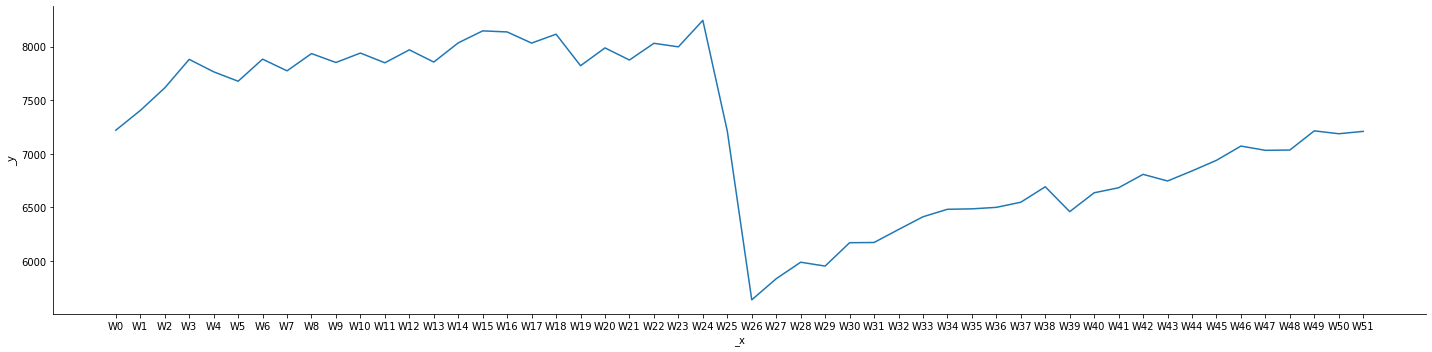

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.relplot(kind='line', data=sum_col, aspect=4)

pada week 0 sampai week 24 transaksi produk sangat banyak dan ketika week 25 - 26 penjualan produk menurun dan bahkan pd saat week 26 merupakan penjualan paling rendah

### produk apa yg paling banyak terjual ?

lihat jumlah penjualan dari setiap produk 

In [ ]:
sum_row = df.sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
sum_row

0      501
1      207
2      452
3      430
4      440
      ... 
806     23
807    142
808     26
809     17
810     16
Length: 811, dtype: int64

In [ ]:
df.Product_Code

0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: Product_Code, Length: 811, dtype: object

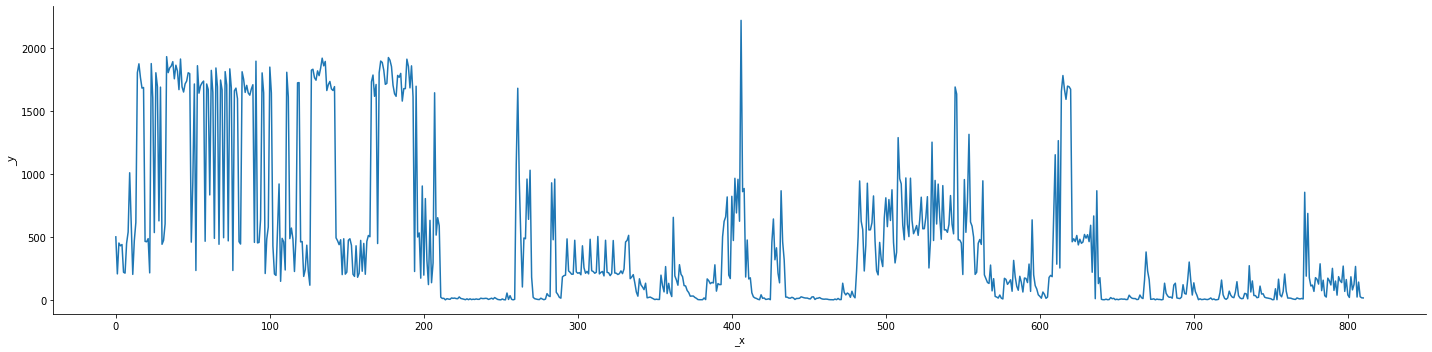

In [ ]:
sns.relplot(kind='line', data=sum_row, aspect=4)

sumbu x adlah nama produk dlm bntk index misal pd sumbu x angka 0 menunjukkan product dg code P1. dari plot diatas kita dpt tahu produk apa yg memiliki jumlah penjualan terbanyak dan terendah, karena ada  810 produk dan jika dilihat dari plot pun angkanya kurang jelas maka kita akan cari angka pastinya. sblm itu kita masukkan dulu kode produk nya

In [ ]:
tot_prod = pd.Series(sum_row, name="total_penjualan")
prod = pd.Series(df["Product_Code"], name="kode_produk")
penjualan_prod = pd.concat([prod, tot_prod], axis=1)

In [ ]:
penjualan_prod

,kode_produk,total_penjualan
0,P1,501
1,P2,207
2,P3,452
3,P4,430
4,P5,440
...,...,...
806,P815,23
807,P816,142
808,P817,26
809,P818,17


In [ ]:
penjualan_prod.set_index("kode_produk", inplace = True)

In [ ]:
penjualan_prod

,total_penjualan
kode_produk,
P1,501
P2,207
P3,452
P4,430
P5,440
...,...
P815,23
P816,142
P817,26


In [ ]:
penjualan_prod['total_penjualan'].nlargest(5)

kode_produk
P409    2220
P34     1932
P178    1925
P135    1920
P43     1913
Name: total_penjualan, dtype: int64

5 produk dg penjualan tertinggi adlh produk dg kode P409, P34, P178, P135, P135 dan P43 

In [ ]:
penjualan_prod['total_penjualan'].nsmallest(5)

kode_produk
P215    1
P251    1
P254    1
P259    1
P469    1
Name: total_penjualan, dtype: int64

diatas adlh 5 produk dg penjualan terendah. menarik karena hanya dr 52 minggu yg terjual hanya 1, mari kita cek 10, 15 & 20 terendah apakah sama ?

In [ ]:
penjualan_prod['total_penjualan'].nsmallest(10)

kode_produk
P215    1
P251    1
P254    1
P259    1
P469    1
P680    1
P684    1
P721    1
P228    2
P230    2
Name: total_penjualan, dtype: int64

In [ ]:
penjualan_prod['total_penjualan'].nsmallest(15)

kode_produk
P215    1
P251    1
P254    1
P259    1
P469    1
P680    1
P684    1
P721    1
P228    2
P230    2
P250    2
P253    2
P279    2
P381    2
P382    2
Name: total_penjualan, dtype: int64

In [ ]:
penjualan_prod['total_penjualan'].nsmallest(20)

kode_produk
P215    1
P251    1
P254    1
P259    1
P469    1
P680    1
P684    1
P721    1
P228    2
P230    2
P250    2
P253    2
P279    2
P381    2
P382    2
P383    2
P421    2
P428    2
P467    2
P468    2
Name: total_penjualan, dtype: int64

mari lihat lagi datanya apakah ada yg bisa kita ambil informasi lainnya

In [ ]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,1,0,0,1,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,1,0,2,2,0,5,1,1,1,2,3,1,0,2,1,7,3,3,3,2,2,3,1,1,4,5,4,3,2,4,6,6,7,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0


In [ ]:
# kode produk
prod

0        P1
1        P2
2        P3
3        P4
4        P5
       ... 
806    P815
807    P816
808    P817
809    P818
810    P819
Name: kode_produk, Length: 811, dtype: object

transpose week

In [ ]:
df.shape[1]

53

In [ ]:
df.iloc[:,df.shape[1]-1]==df['W51']

0      True
1      True
2      True
3      True
4      True
       ... 
806    True
807    True
808    True
809    True
810    True
Name: W51, Length: 811, dtype: bool

In [ ]:
week = df.drop(['Product_Code'], axis=1)

In [ ]:
week

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13,W14,W15,W16,W17,W18,W19,W20,W21,W22,W23,W24,W25,W26,W27,W28,W29,W30,W31,W32,W33,W34,W35,W36,W37,W38,W39,W40,W41,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,11,12,10,8,13,12,14,21,6,14,11,14,16,9,9,9,14,9,3,12,5,11,7,12,5,9,7,10,5,11,7,10,12,6,5,14,10,9,12,17,7,11,4,7,8,10,12,3,7,6,5,10
1,7,6,3,2,7,1,6,3,3,3,2,2,6,2,0,6,2,7,7,9,4,7,2,4,5,3,5,8,5,5,3,1,3,2,3,10,5,2,7,3,2,5,2,4,5,1,1,4,5,1,6,0
2,7,11,8,9,10,8,7,13,12,6,14,9,4,7,12,8,7,11,10,7,7,13,11,8,10,8,14,5,3,13,11,9,7,8,7,9,6,12,12,9,3,5,6,14,5,5,7,8,14,8,8,7
3,12,8,13,5,9,6,9,13,13,11,8,4,5,4,15,7,11,9,15,4,6,7,11,7,9,6,10,10,2,6,7,2,5,12,5,19,8,6,8,8,12,6,9,10,3,4,6,8,14,8,7,8
4,8,5,13,11,6,7,9,14,9,9,11,18,8,4,13,8,10,15,6,13,11,6,10,9,8,12,8,9,13,3,5,3,5,5,9,7,4,8,8,5,5,8,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0,0,1,0,0,2,1,0,0,1,0,0,1,0,1,1,3,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,2,1,0,0,1,1,0,0,1,0,0,2,0
807,0,1,0,0,1,2,2,6,0,1,0,2,2,0,5,1,1,1,2,3,1,0,2,1,7,3,3,3,2,2,3,1,1,4,5,4,3,2,4,6,6,7,3,3,4,2,4,5,5,5,6,5
808,1,0,0,0,1,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0,0,2,2,0,0,0,4,3
809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,0


In [ ]:
import numpy as np
transpose_week = week.T

In [ ]:
transpose_week

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810
W0,11,7,7,12,8,3,4,8,14,22,15,3,12,14,19,30,49,40,26,13,12,8,3,36,26,14,44,34,13,46,7,15,15,47,34,41,36,37,31,41,...,0,9,5,15,3,3,1,1,4,2,3,4,0,0,0,0,2,2,6,3,3,3,1,3,2,0,4,0,0,0,0,5,3,1,4,0,0,1,0,0
W1,12,6,11,8,5,3,8,6,9,19,7,4,10,12,45,27,40,38,31,17,5,14,5,42,28,14,34,32,10,36,17,13,12,42,37,32,39,36,21,27,...,0,13,7,12,1,1,2,0,3,1,1,3,1,1,0,0,5,3,0,3,2,2,1,2,2,6,5,0,3,1,0,1,2,1,2,0,1,0,0,1
W2,10,3,8,13,13,2,3,10,10,19,15,1,9,9,47,27,40,39,45,11,9,8,4,27,33,9,33,36,12,45,6,10,11,24,26,39,43,43,28,27,...,0,15,4,7,2,4,2,2,3,1,5,4,0,1,1,0,0,2,3,5,1,0,1,3,5,3,7,2,3,0,1,3,0,1,2,1,0,0,0,0
W3,8,2,9,5,11,7,7,9,7,29,14,6,6,11,42,43,28,38,36,10,8,9,3,33,32,8,39,41,17,34,7,4,17,55,27,45,42,52,39,51,...,0,15,6,16,1,0,2,0,5,6,2,2,1,4,0,1,3,2,1,3,0,3,0,3,3,2,4,0,3,1,0,5,0,3,6,0,0,0,1,0
W4,13,7,10,9,6,6,8,6,11,20,17,4,10,13,29,29,40,39,31,7,9,17,3,40,20,9,34,31,17,35,9,13,10,42,49,38,38,61,53,37,...,0,16,2,18,3,1,1,1,1,1,0,6,0,2,0,0,3,2,0,5,0,2,3,7,1,5,7,1,1,1,0,4,2,2,0,0,1,1,0,0
W5,12,1,8,6,7,3,7,8,15,16,7,3,11,12,44,32,47,33,28,11,6,6,2,48,33,7,30,31,11,36,7,7,18,23,48,40,37,50,39,38,...,0,17,2,9,4,1,0,1,4,4,4,6,3,1,0,0,0,3,2,4,0,3,2,3,4,2,2,0,2,0,0,4,1,2,4,2,2,1,0,0
W6,14,6,7,9,9,8,2,7,12,26,10,7,18,8,43,49,44,28,28,17,10,17,5,38,42,9,47,32,15,43,11,10,11,41,36,39,31,35,25,48,...,0,14,3,15,3,0,6,3,6,2,3,6,1,1,1,0,4,3,1,2,1,3,1,1,5,0,7,0,3,1,0,4,0,5,7,1,2,2,0,0
W7,21,3,13,13,14,6,3,5,7,20,16,3,8,12,36,41,45,44,34,8,13,15,4,39,29,11,27,29,16,28,10,12,16,51,34,39,26,52,31,40,...,0,15,6,13,4,3,4,1,3,4,4,7,2,3,0,0,1,4,3,2,2,1,0,3,1,1,4,2,2,0,0,2,2,5,8,0,6,1,0,0
W8,6,3,12,13,9,6,10,10,13,24,11,5,10,13,25,49,39,36,42,12,6,11,5,41,24,10,45,43,10,26,13,11,8,45,28,27,36,49,43,39,...,0,15,4,17,1,3,3,1,1,5,0,6,2,1,0,1,4,3,1,1,0,6,0,3,2,3,5,0,3,0,0,2,2,1,3,0,0,1,1,0
W9,14,3,6,11,9,3,3,10,12,20,8,3,17,10,52,38,33,36,40,10,12,13,5,39,32,14,39,33,12,33,9,15,6,29,41,48,29,46,40,40,...,0,19,2,22,4,0,2,1,5,1,4,4,0,2,1,0,5,2,3,3,0,1,0,1,3,1,7,2,1,2,0,3,2,3,2,1,1,0,0,0


In [ ]:
transpose_week.shape[1] == prod.shape[0]

True

In [ ]:
data = transpose_week.rename(columns=prod)

In [ ]:
data

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
W0,11,7,7,12,8,3,4,8,14,22,15,3,12,14,19,30,49,40,26,13,12,8,3,36,26,14,44,34,13,46,7,15,15,47,34,41,36,37,31,41,...,0,9,5,15,3,3,1,1,4,2,3,4,0,0,0,0,2,2,6,3,3,3,1,3,2,0,4,0,0,0,0,5,3,1,4,0,0,1,0,0
W1,12,6,11,8,5,3,8,6,9,19,7,4,10,12,45,27,40,38,31,17,5,14,5,42,28,14,34,32,10,36,17,13,12,42,37,32,39,36,21,27,...,0,13,7,12,1,1,2,0,3,1,1,3,1,1,0,0,5,3,0,3,2,2,1,2,2,6,5,0,3,1,0,1,2,1,2,0,1,0,0,1
W2,10,3,8,13,13,2,3,10,10,19,15,1,9,9,47,27,40,39,45,11,9,8,4,27,33,9,33,36,12,45,6,10,11,24,26,39,43,43,28,27,...,0,15,4,7,2,4,2,2,3,1,5,4,0,1,1,0,0,2,3,5,1,0,1,3,5,3,7,2,3,0,1,3,0,1,2,1,0,0,0,0
W3,8,2,9,5,11,7,7,9,7,29,14,6,6,11,42,43,28,38,36,10,8,9,3,33,32,8,39,41,17,34,7,4,17,55,27,45,42,52,39,51,...,0,15,6,16,1,0,2,0,5,6,2,2,1,4,0,1,3,2,1,3,0,3,0,3,3,2,4,0,3,1,0,5,0,3,6,0,0,0,1,0
W4,13,7,10,9,6,6,8,6,11,20,17,4,10,13,29,29,40,39,31,7,9,17,3,40,20,9,34,31,17,35,9,13,10,42,49,38,38,61,53,37,...,0,16,2,18,3,1,1,1,1,1,0,6,0,2,0,0,3,2,0,5,0,2,3,7,1,5,7,1,1,1,0,4,2,2,0,0,1,1,0,0
W5,12,1,8,6,7,3,7,8,15,16,7,3,11,12,44,32,47,33,28,11,6,6,2,48,33,7,30,31,11,36,7,7,18,23,48,40,37,50,39,38,...,0,17,2,9,4,1,0,1,4,4,4,6,3,1,0,0,0,3,2,4,0,3,2,3,4,2,2,0,2,0,0,4,1,2,4,2,2,1,0,0
W6,14,6,7,9,9,8,2,7,12,26,10,7,18,8,43,49,44,28,28,17,10,17,5,38,42,9,47,32,15,43,11,10,11,41,36,39,31,35,25,48,...,0,14,3,15,3,0,6,3,6,2,3,6,1,1,1,0,4,3,1,2,1,3,1,1,5,0,7,0,3,1,0,4,0,5,7,1,2,2,0,0
W7,21,3,13,13,14,6,3,5,7,20,16,3,8,12,36,41,45,44,34,8,13,15,4,39,29,11,27,29,16,28,10,12,16,51,34,39,26,52,31,40,...,0,15,6,13,4,3,4,1,3,4,4,7,2,3,0,0,1,4,3,2,2,1,0,3,1,1,4,2,2,0,0,2,2,5,8,0,6,1,0,0
W8,6,3,12,13,9,6,10,10,13,24,11,5,10,13,25,49,39,36,42,12,6,11,5,41,24,10,45,43,10,26,13,11,8,45,28,27,36,49,43,39,...,0,15,4,17,1,3,3,1,1,5,0,6,2,1,0,1,4,3,1,1,0,6,0,3,2,3,5,0,3,0,0,2,2,1,3,0,0,1,1,0
W9,14,3,6,11,9,3,3,10,12,20,8,3,17,10,52,38,33,36,40,10,12,13,5,39,32,14,39,33,12,33,9,15,6,29,41,48,29,46,40,40,...,0,19,2,22,4,0,2,1,5,1,4,4,0,2,1,0,5,2,3,3,0,1,0,1,3,1,7,2,1,2,0,3,2,3,2,1,1,0,0,0


coba lihat korelasi antar produk mungkin dpt suatu informasi

In [ ]:
# lihat korelasi
data.corr(method ='pearson')

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,...,P780,P781,P782,P783,P784,P785,P786,P787,P788,P789,P790,P791,P792,P793,P794,P795,P796,P797,P798,P799,P800,P801,P802,P803,P804,P805,P806,P807,P808,P809,P810,P811,P812,P813,P814,P815,P816,P817,P818,P819
P1,1.000000,0.093481,0.023903,0.013570,0.115978,-0.138826,0.004091,-4.923104e-02,0.193867,0.164238,0.103561,0.069492,-0.070621,0.034632,0.235323,-0.085465,0.276088,0.184971,0.085254,0.245092,0.123461,0.270285,0.123735,0.134136,-0.024574,0.107538,-0.006693,0.000700,0.092922,0.302165,0.059904,0.211428,-0.048318,0.032064,0.139004,0.317088,-0.032926,0.180479,-0.099446,0.260813,...,-2.447783e-01,-0.114694,-0.088390,-0.090590,-0.249267,-0.174297,-0.026329,0.007771,0.124593,-0.335573,0.098487,-0.044158,-0.192757,-0.248295,-0.047759,-0.267810,-0.149609,-0.166085,0.222758,-0.177186,-0.277583,-0.189950,-0.033376,-0.009243,-0.335814,-0.082694,-0.188304,-0.208328,-0.098650,-0.126325,-0.042065,0.115637,0.176567,-0.015776,-0.088873,0.141997,-0.100601,-0.039451,-0.277677,-0.076855
P2,0.093481,1.000000,0.036045,0.179777,-0.085899,0.165306,0.056330,1.974994e-01,0.110839,-0.063108,-0.040563,0.107444,0.006671,-0.090811,0.057794,-0.131289,0.160766,-0.071989,-0.108845,0.025580,-0.019667,0.086957,0.228636,-0.087149,-0.020971,-0.014748,0.214272,0.072055,0.083476,0.031482,0.011234,0.085463,-0.014923,0.067444,0.076521,0.233515,0.232911,-0.082650,-0.041303,0.088066,...,6.885893e-02,-0.095210,0.065335,-0.070449,0.082902,-0.046049,-0.022298,-0.169023,-0.100747,-0.229446,-0.102040,0.063975,-0.077383,-0.261940,0.075239,0.062243,0.165528,-0.025321,-0.135521,-0.266556,-0.030653,-0.199208,-0.027885,0.044806,-0.159629,-0.165649,-0.080583,-0.124407,-0.270584,0.344196,0.154581,-0.109031,-0.122823,-0.057529,-0.153341,-0.063563,-0.050610,-0.118569,-0.055369,0.252053
P3,0.023903,0.036045,1.000000,0.331989,0.015307,-0.047034,0.007190,-2.033840e-01,-0.043892,0.075233,0.082669,0.064462,0.125480,0.102572,-0.080277,-0.007599,-0.050188,0.045869,0.059761,-0.002137,0.022714,0.181782,0.147454,0.006337,-0.149968,0.100689,-0.054102,0.142987,0.054655,-0.126103,-0.202052,-0.098309,0.069701,0.123131,-0.008936,0.044589,0.024105,0.338705,-0.003068,0.167920,...,1.960852e-02,-0.055372,0.116178,0.175168,-0.153783,-0.016169,0.020837,-0.160141,-0.341138,0.053291,-0.061128,0.008346,-0.095762,-0.108065,-0.325087,-0.156643,0.089352,0.067921,-0.285768,-0.203881,-0.019763,0.039896,0.039296,-0.086132,-0.061343,0.085194,-0.147100,0.126138,0.022348,0.090929,-0.363098,0.014203,-0.224207,0.093968,-0.062539,-0.258461,-0.087826,-0.222629,0.015015,0.114148
P4,0.013570,0.179777,0.331989,1.000000,-0.004180,0.088540,0.075769,-1.319482e-01,-0.147555,-0.251536,0.086646,0.026736,0.280180,0.085523,-0.005476,0.068745,0.156447,0.150313,0.329080,0.028085,0.189892,0.207520,0.160793,0.021111,0.022062,0.104849,0.335511,-0.033113,0.103648,-0.165579,-0.084421,0.052607,0.093581,-0.012146,-0.046701,-0.011403,0.121166,0.085177,0.019217,0.047463,...,6.425739e-02,0.004327,0.311153,0.074935,0.020917,-0.054707,0.048469,-0.119116,-0.087664,-0.085394,0.082454,0.069730,0.000314,0.004176,-0.062806,-0.016625,0.110002,0.063213,0.039859,-0.228331,0.136758,0.138807,0.060906,-0.109201,-0.016244,-0.081269,0.057714,0.214037,-0.106443,-0.049088,-0.048891,-0.313928,-0.198392,0.283820,0.023368,-0.024208,0.152529,-0.044025,-0.225654,0.444654
P5,0.115978,-0.085899,0.015307,-0.004180,1.000000,-0.123861,0.144811,-2.786816e-02,0.116735,0.307461,0.034993,0.095440,0.102686,0.359331,0.248298,0.016643,0.109499,0.238369,0.131323,0.061353,0.060058,0.090882,0.311686,-0.110162,0.090384,0.014559,-0.014435,0.185893,0.264252,0.328716,0.056489,-0.006051,0.143699,0.087542,-0.186211,0.124402,0.253671,0.332351,0.157766,-0.069233,...,-1.414726e-01,0.141826,-0.043113,-0.158828,0.159307,0.154568,0.137585,-0.150703,0.144191,0.174247,0.017541,0.281135,0.030745,-0.006538,-0.049447,0.069993,0.037547,0.172030,-0

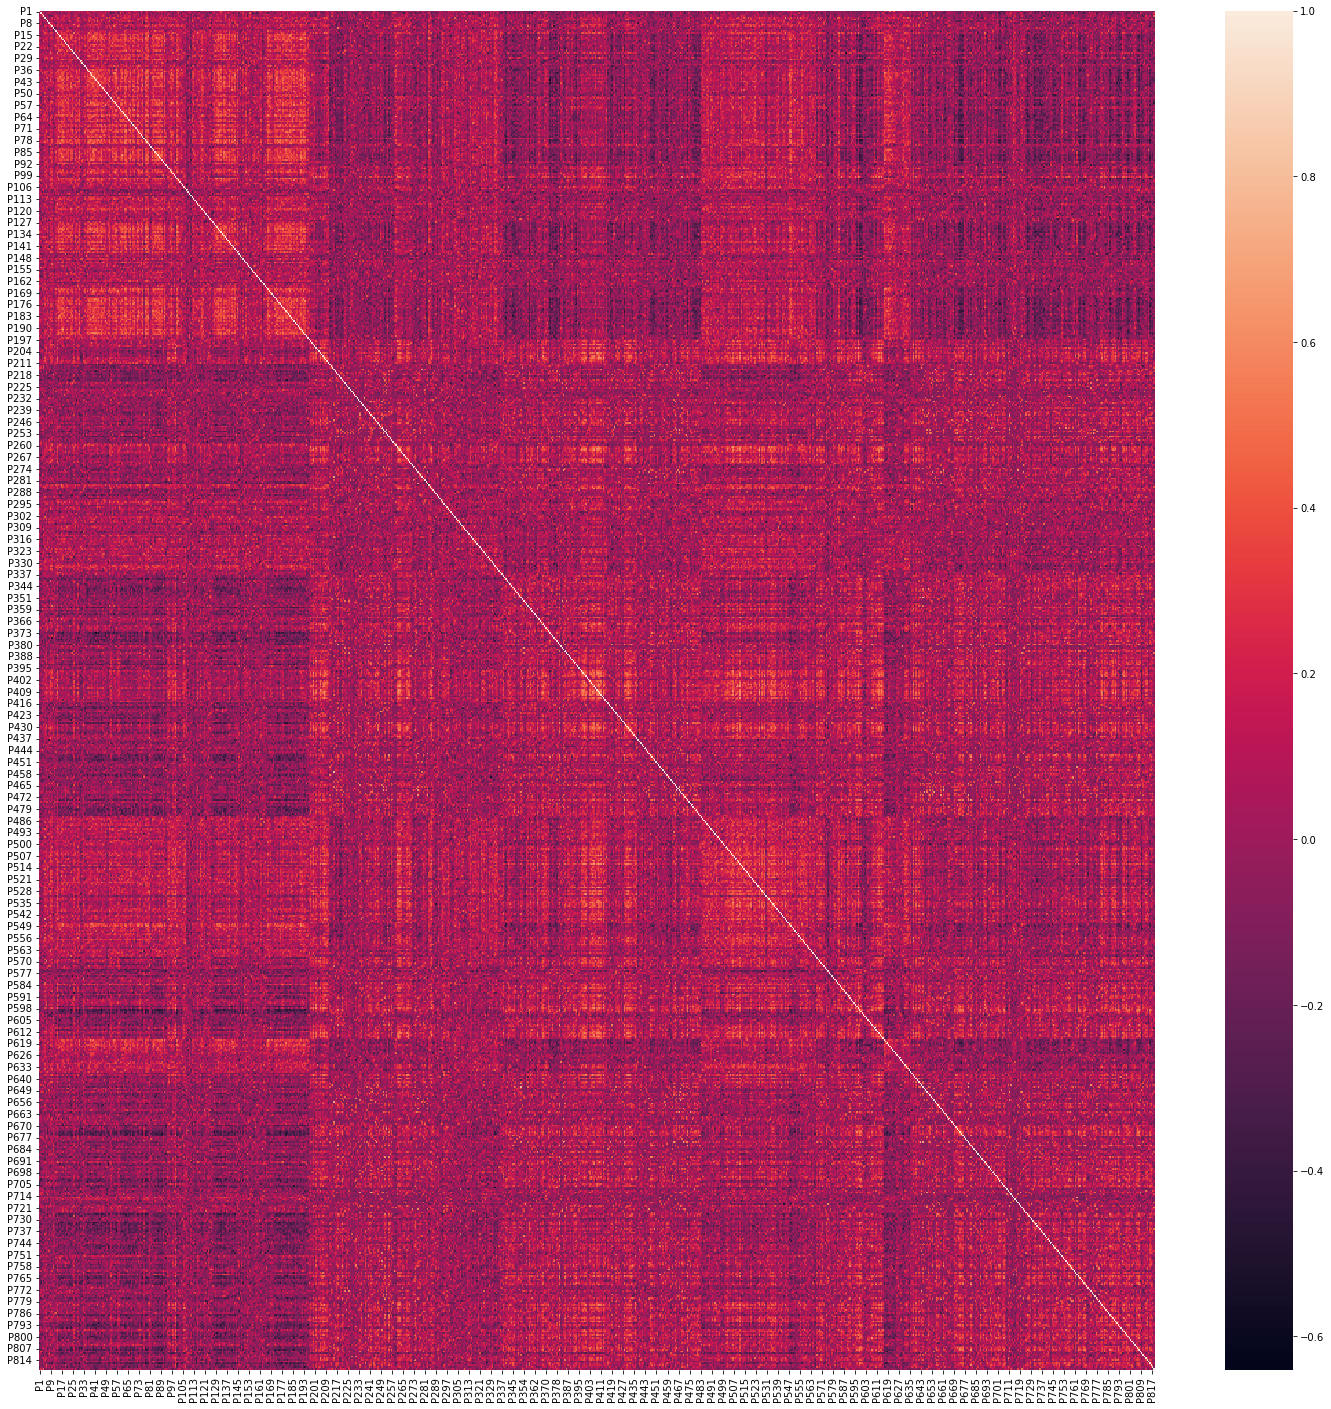

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(data.corr(method ='pearson'), ax=ax)
plt.show()

In [ ]:
# pilih yg korelasinya lbh dr +- 0.7
kor = data.corr(method ='pearson').unstack()
kor1 = kor[abs(kor) >= 0.6]
print(kor1)

P1    P1      1.00000
P2    P2      1.00000
P3    P3      1.00000
P4    P4      1.00000
P5    P5      1.00000
               ...   
P816  P816    1.00000
P817  P682    0.60404
      P817    1.00000
P818  P818    1.00000
P819  P819    1.00000
Length: 1183, dtype: float64


In [ ]:
kor2 = kor1[abs(kor1) < 1]
print(kor2)

P5    P545    0.635965
P18   P191    0.738346
P40   P168    0.603169
P42   P373   -0.611594
P46   P599   -0.640279
                ...   
P808  P428    0.632747
      P474    0.659147
      P682    0.611046
P809  P430    0.608627
P817  P682    0.604040
Length: 372, dtype: float64


In [ ]:
kor2.shape

(372,)

karena 2 hub variabel dimasukkan maka variabel yg berelasi kuat adlah 

In [ ]:
kor2.shape[0]/2

186.0

### bagaimana jumlah penjualan setiap produk dlm 52 minggu ?

In [ ]:
# show all code product with json format
list_pro = prod.to_json()
list_props

'{"0":"P1","1":"P2","2":"P3","3":"P4","4":"P5","5":"P6","6":"P7","7":"P8","8":"P9","9":"P10","10":"P11","11":"P12","12":"P13","13":"P14","14":"P15","15":"P16","16":"P17","17":"P18","18":"P19","19":"P20","20":"P21","21":"P22","22":"P23","23":"P24","24":"P25","25":"P26","26":"P27","27":"P28","28":"P29","29":"P30","30":"P31","31":"P32","32":"P33","33":"P34","34":"P35","35":"P36","36":"P37","37":"P38","38":"P39","39":"P40","40":"P41","41":"P42","42":"P43","43":"P44","44":"P45","45":"P46","46":"P47","47":"P48","48":"P49","49":"P50","50":"P51","51":"P52","52":"P53","53":"P54","54":"P55","55":"P56","56":"P57","57":"P58","58":"P59","59":"P60","60":"P61","61":"P62","62":"P63","63":"P64","64":"P65","65":"P66","66":"P67","67":"P68","68":"P69","69":"P70","70":"P71","71":"P72","72":"P73","73":"P74","74":"P75","75":"P76","76":"P77","77":"P78","78":"P79","79":"P80","80":"P81","81":"P82","82":"P83","83":"P84","84":"P85","85":"P86","86":"P87","87":"P88","88":"P89","89":"P90","90":"P91","91":"P92","92":

In [ ]:
prod.dtypes

dtype('O')

In [ ]:
#@title Pilih Kode produk yg ingin diketahui jumlah penjualannya dan minggu terbanyak sekaligus tersedikit penjualannya
produk_nilai = 90  #@param {type: "slider", min: 0, max: 811}

In [ ]:
# convert nilai produk yg dipilih jd kode produk
dipil = prod.iloc[[produk_nilai]]
dipil = dipil.to_string(index=False)
dipil

'P91'

In [ ]:
dt = data
dt["Minggu"] = dt.index
join = pd.concat([dt["Minggu"], dt.iloc[:,produk_nilai]], axis=1)

Text(0, 0.5, 'Jumlah Penjualan')

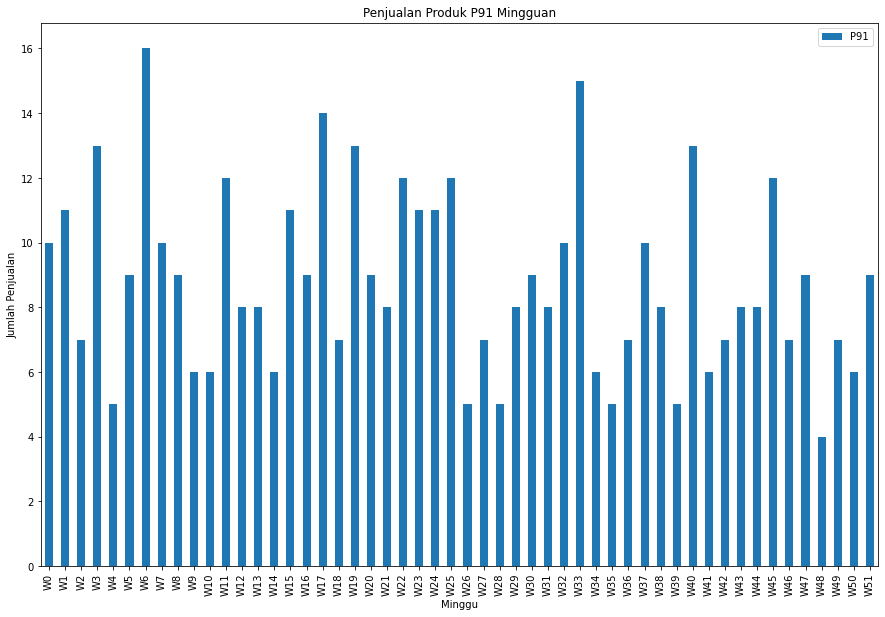

In [ ]:
plt.rcParams["figure.figsize"] = [15, 10]
join.plot(kind="bar")
plt.title("Penjualan Produk {} Mingguan".format(dipil))
plt.xlabel("Minggu")
plt.ylabel("Jumlah Penjualan")

Text(0, 0.5, 'Jumlah Penjualan')

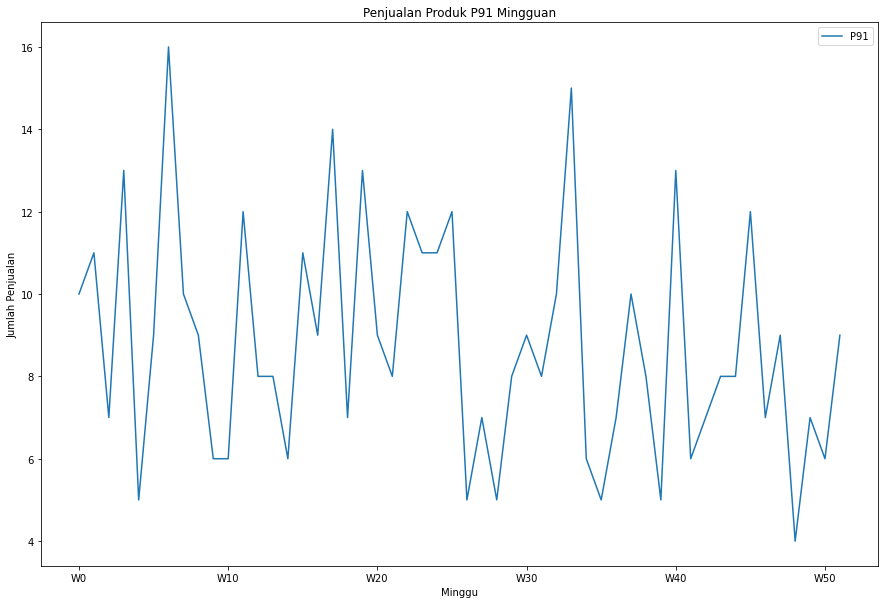

In [ ]:
plt.rcParams["figure.figsize"] = [15, 10]
join.plot()
plt.title("Penjualan Produk {} Mingguan".format(dipil))
plt.xlabel("Minggu")
plt.ylabel("Jumlah Penjualan")

### 5 minggu dengan penjualan produk terbanyak dan tersedikit pada produk tertentu

Text(0, 0.5, 'Jumlah Penjualan')

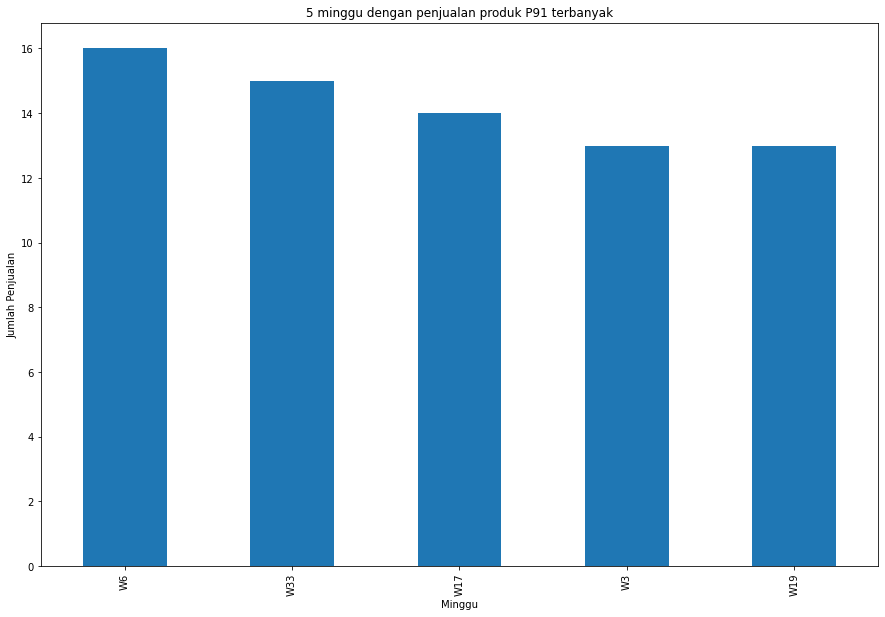

In [ ]:
join[dipil].nlargest(5).plot(kind="bar")
plt.title("5 minggu dengan penjualan produk {} terbanyak".format(dipil))
plt.xlabel("Minggu")
plt.ylabel("Jumlah Penjualan")

Text(0, 0.5, 'Jumlah Penjualan')

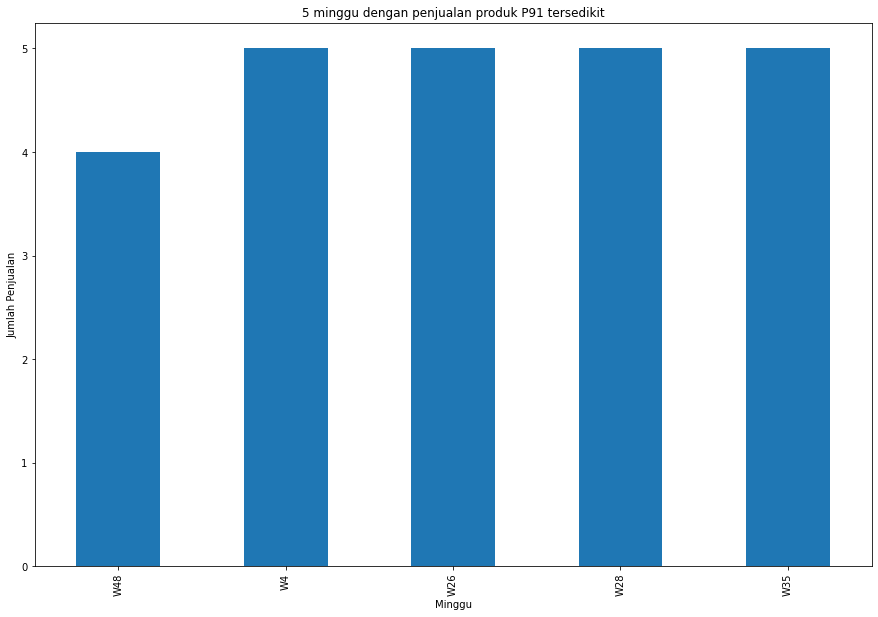

In [ ]:
join[dipil].nsmallest(5).plot(kind="bar")
plt.title("5 minggu dengan penjualan produk {} tersedikit".format(dipil))
plt.xlabel("Minggu")
plt.ylabel("Jumlah Penjualan")